# Initial exploration

Goal is to predict `SalePrice` variable

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

from src.data.make_dataset import Dataset
from src.visualization.visualize import create_pandas_profiling

import warnings
warnings.filterwarnings('ignore')

C:\Utilisateurs\a557847\AppData\Local\Continuum\anaconda3\envs\house-prices-advanced-regression-techniques\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Utilisateurs\a557847\AppData\Local\Continuum\anaconda3\envs\house-prices-advanced-regression-techniques\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Utilisateurs\a557847\AppData\Local\Continuum\anaconda3\envs\house-prices-advanced-regression-techniques\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Utilisateurs\a557847\AppData\Local\Continuum\anaconda3\envs\house-prices-advanced-regression-techniques\lib\site-packages\ipykernel_launche

In [3]:
dataset = Dataset()
train, test = dataset.data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## SalePrice

Let's first look at SalePrice, the dependent variable.

In [4]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

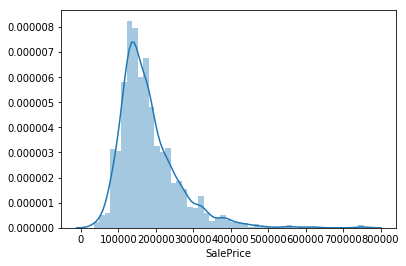

In [5]:
sns.distplot(train['SalePrice']);

The variable is a bit skewed to the left and doesn't look too normal in a statistical way.

## A first look at quantitative variables

In [6]:
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
def facetgrid_scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x=plt.xticks(rotation=90)

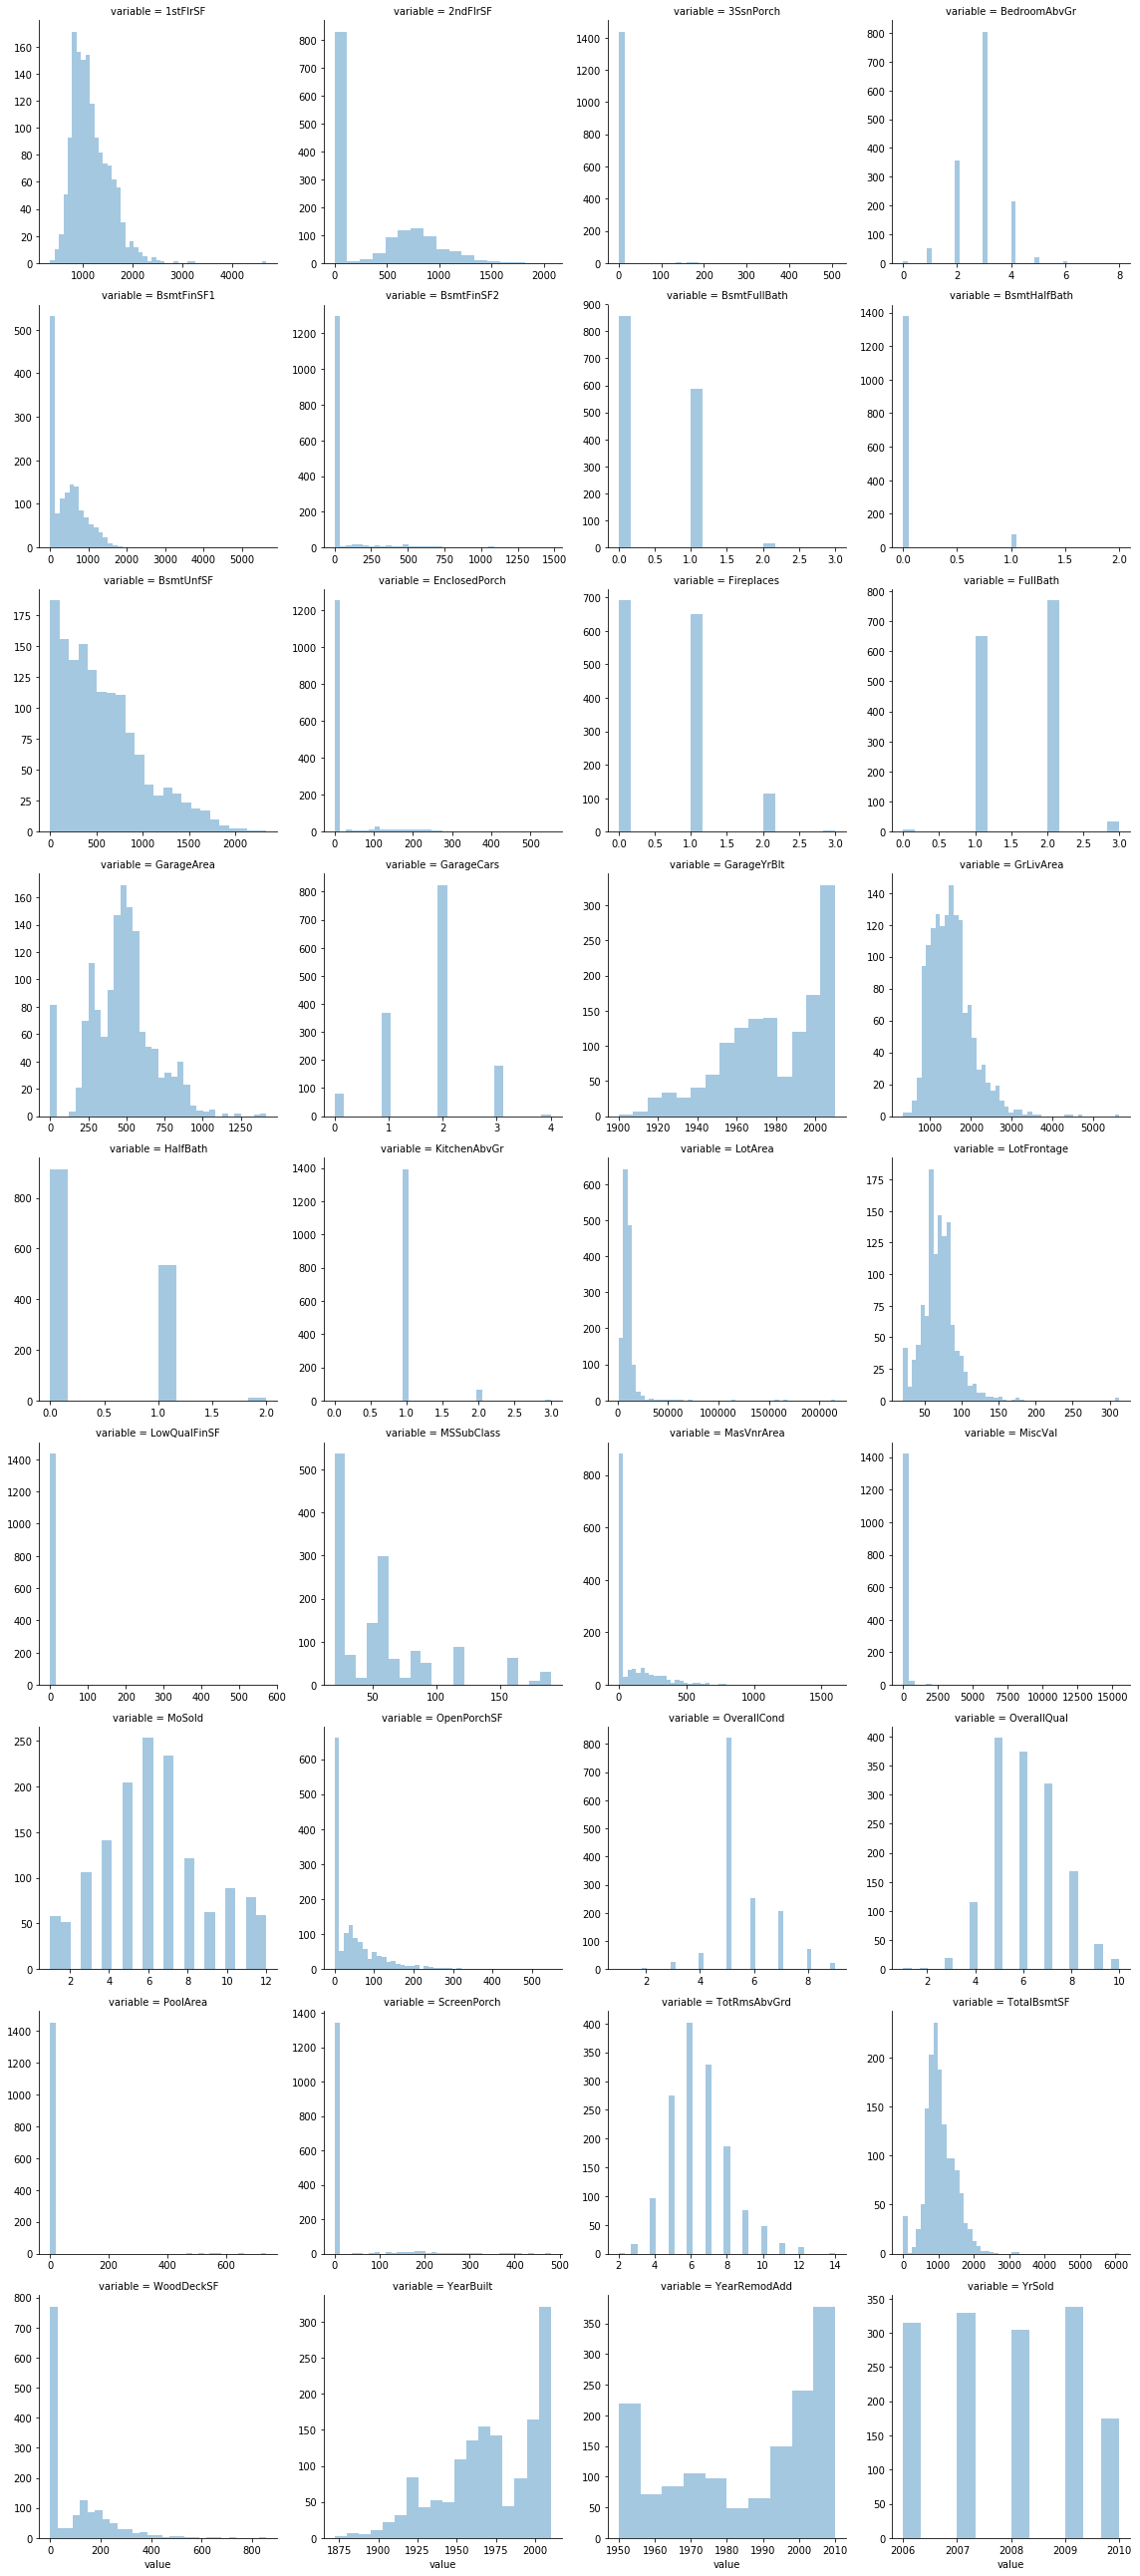

In [7]:
f = pd.melt(train, value_vars=sorted(dataset.quantitative_cols))
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False, size=4)
g = g.map(sns.distplot, "value", kde=False)

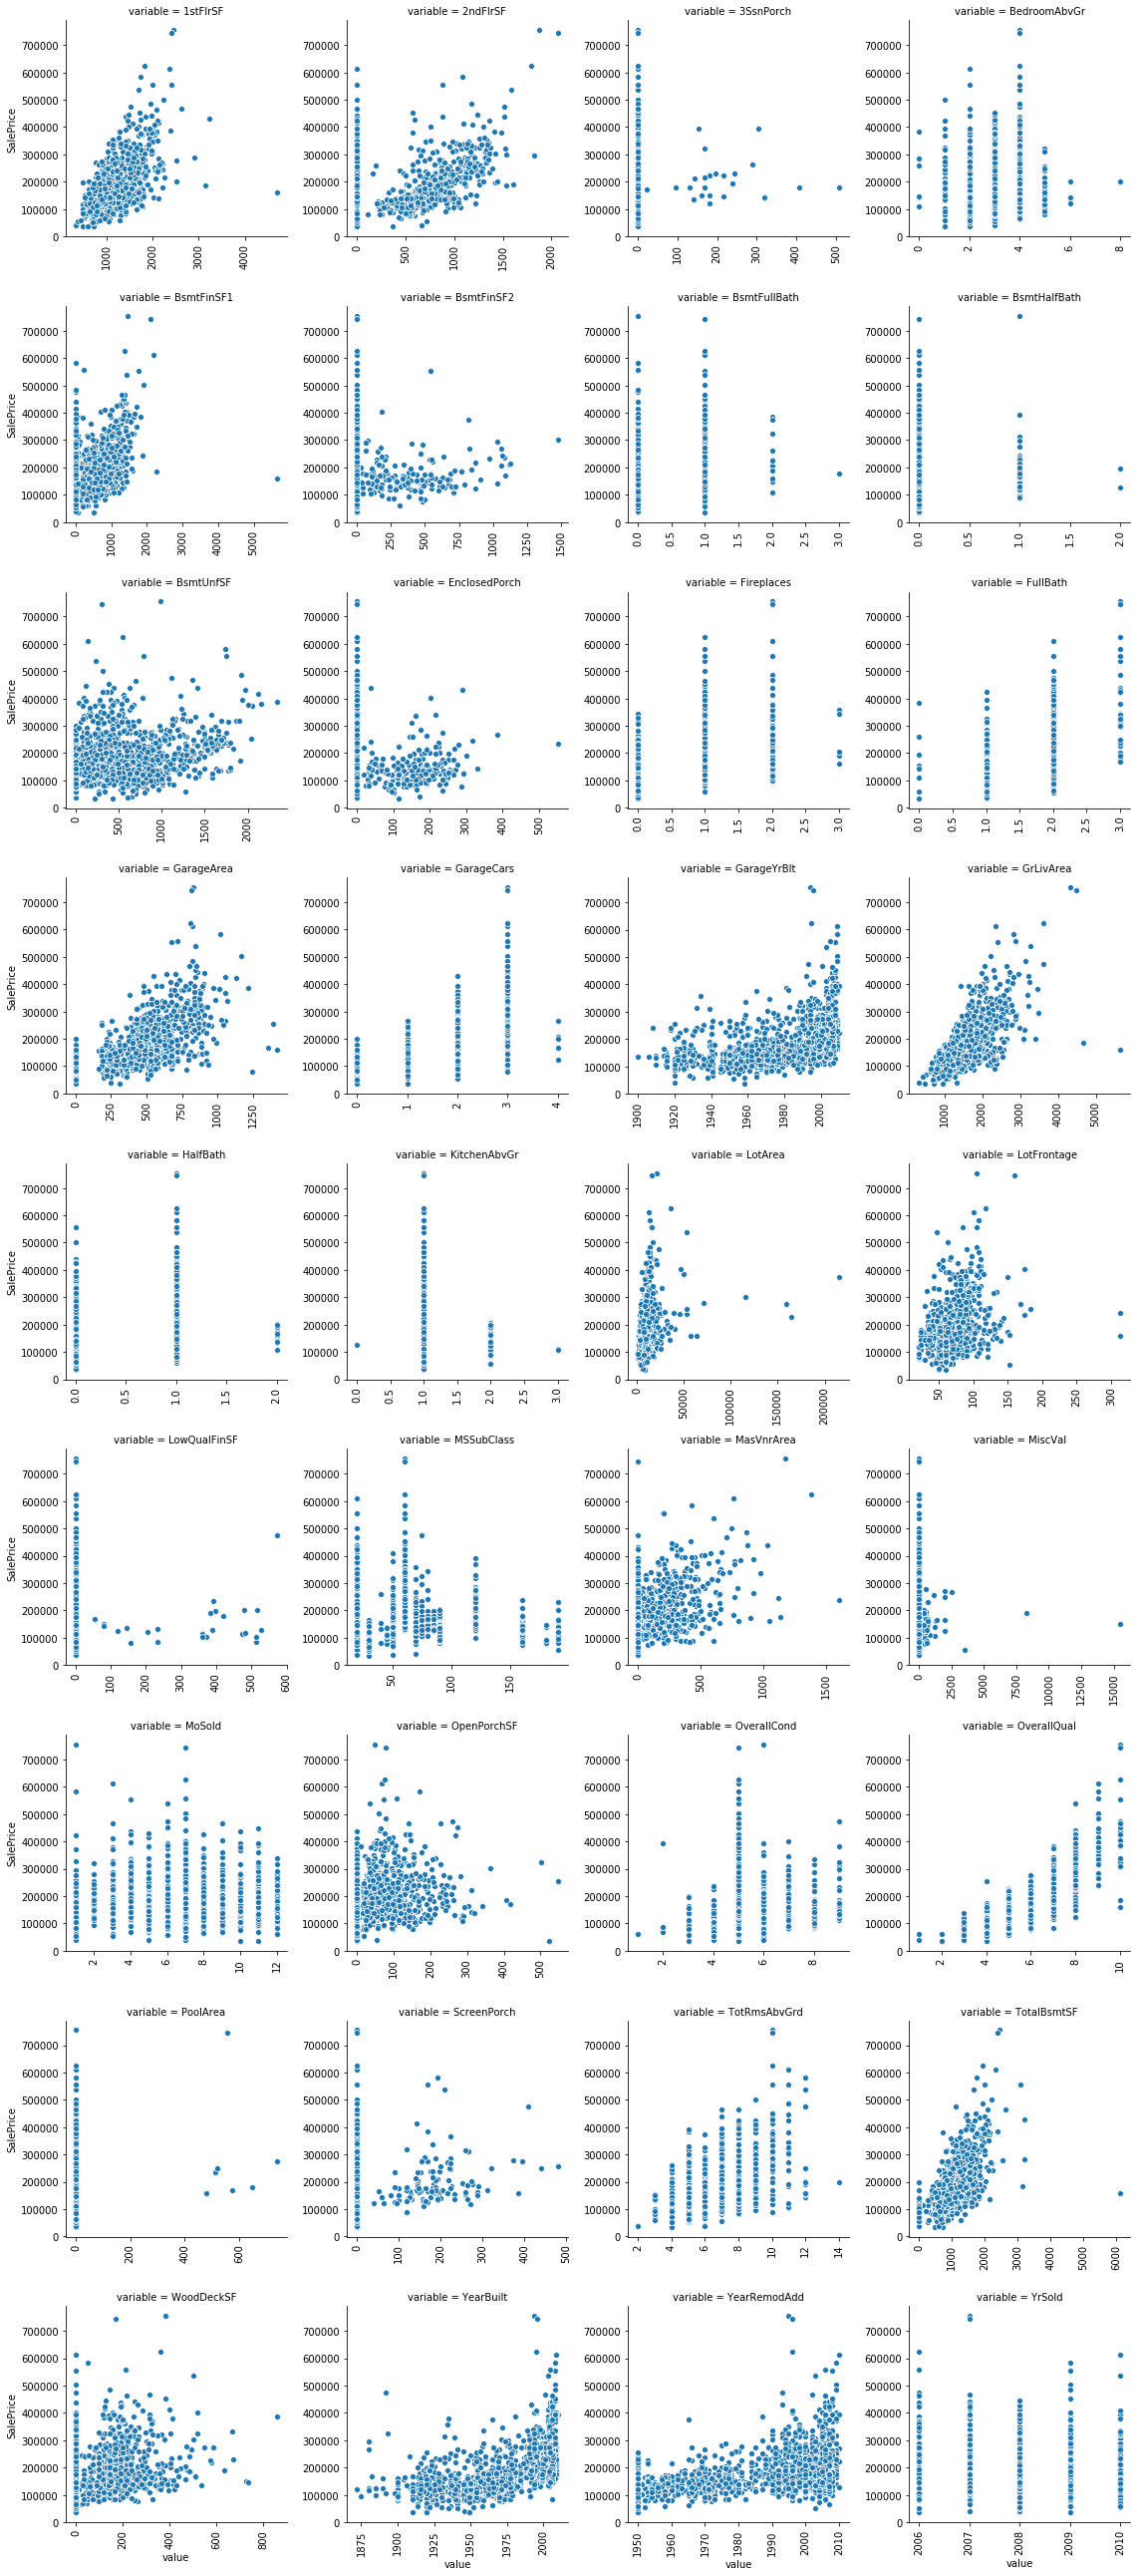

In [8]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(dataset.quantitative_cols))
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=4)
g = g.map(facetgrid_scatterplot, "value", "SalePrice")

## A first look at qualitative variables

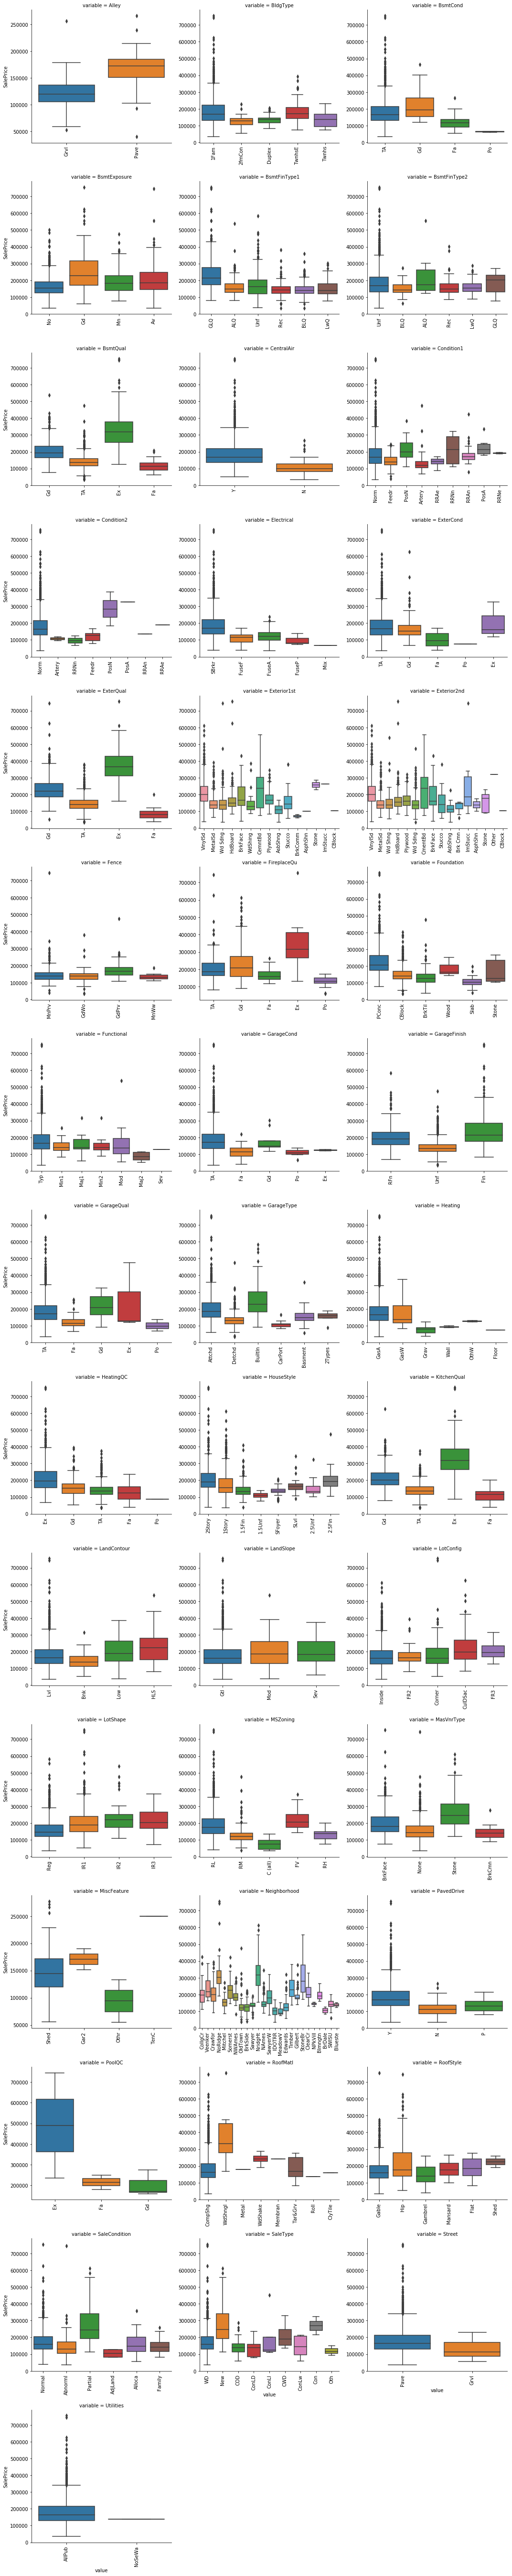

In [10]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(dataset.qualitative_cols))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")